In [1]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [76]:
crime_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\FE2_NYPD_Complaint_Data_Historic.csv"
df_Crime = pd.read_csv(crime_file)

C:\Users\BGaither\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
df_Crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,OFNS_DESC_TYPE
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0,Non-Violent Crime
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON NEGL. MANSLAUGHTER,NaN,NaN,...,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0,Violent Crime
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0,Non-Violent Crime
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0,Violent Crime
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0,Violent Crime


In [78]:
#create a binary 1 or 0 column for label
#violent crime = 1
df_Crime['y'] = np.where(df_Crime.OFNS_DESC_TYPE == 'Violent Crime',1,0)

In [79]:
df_Crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,OFNS_DESC_TYPE,y
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0,Non-Violent Crime,0
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON NEGL. MANSLAUGHTER,NaN,NaN,...,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0,Violent Crime,1
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0,Non-Violent Crime,0
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0,Violent Crime,1
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0,Violent Crime,1


In [80]:
#grab the features we want to start working with in a classifier
df_Crime = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y','y']]

In [81]:
len(df_Crime) - df_Crime.count()

JURIS_DESC                0
BORO_NM                   0
ADDR_PCT_CD               1
LOC_OF_OCCUR_DESC    216633
PREM_TYP_DESC          4676
Day_Name                 65
Duration             205484
Duration_to_PD           65
Month                    65
Day                      65
Year                     65
Duration_lbl         256976
Season                   65
Daytime               49781
GeoCell               32363
GeoCell_X             32329
GeoCell_Y             32362
y                         0
dtype: int64

In [82]:
df_Crime = df_Crime.dropna()

In [83]:
df_Crime.shape

(587637, 18)

In [84]:
#Value Counts by Crime Type
df_Crime['y'].value_counts()

0    405901
1    181736
Name: y, dtype: int64

In [93]:
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['y']]

Text(0, 0.5, 'Frequency of Offense')

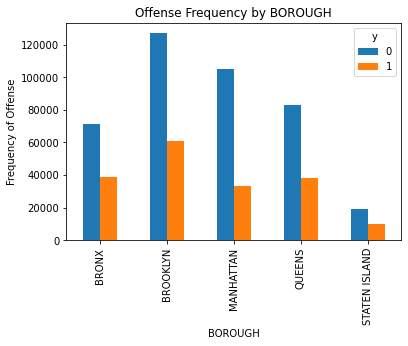

In [86]:
%matplotlib inline
pd.crosstab(X.BORO_NM,y.y).plot(kind='bar')
plt.title('Offense Frequency by BOROUGH')
plt.xlabel('BOROUGH')
plt.ylabel('Frequency of Offense')

Text(0, 0.5, 'Frequency of Offense')

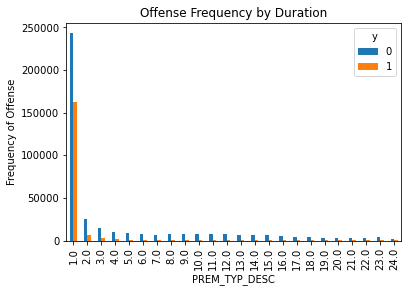

In [87]:
%matplotlib inline
pd.crosstab(X.Duration,y.y).plot(kind='bar')
plt.title('Offense Frequency by Duration')
plt.xlabel('PREM_TYP_DESC')
plt.ylabel('Frequency of Offense')

Text(0, 0.5, 'Frequency of Offense')

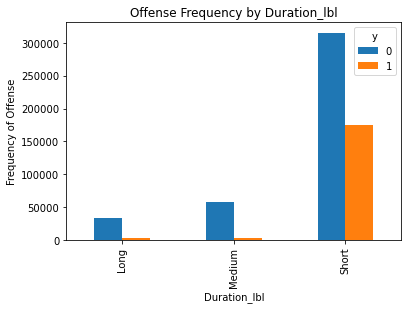

In [88]:
%matplotlib inline
pd.crosstab(X.Duration_lbl,y.y).plot(kind='bar')
plt.title('Offense Frequency by Duration_lbl')
plt.xlabel('Duration_lbl')
plt.ylabel('Frequency of Offense')

In [94]:
#first, let's balance the classes

from imblearn.over_sampling import SMOTE

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together for X_train
X = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X = df1

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-violent in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of viloent",len(os_data_y[os_data_y['y']==1]))
print("Proportion of non-violent data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of violent data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  649552
Number of non-violent in oversampled data 324776
Number of viloent 324776
Proportion of non-violent data in oversampled data is  0.5
Proportion of violent data in oversampled data is  0.5


In [98]:
os_data_X.columns.values.tolist()

['x0_AMTRACK',
 'x0_DEPT OF CORRECTIONS',
 'x0_HEALTH & HOSP CORP',
 'x0_LONG ISLAND RAILRD',
 'x0_METRO NORTH',
 'x0_N.Y. HOUSING POLICE',
 'x0_N.Y. POLICE DEPT',
 'x0_N.Y. STATE PARKS',
 'x0_N.Y. STATE POLICE',
 'x0_N.Y. TRANSIT POLICE',
 'x0_NEW YORK CITY SHERIFF OFFICE',
 'x0_NYC PARKS',
 'x0_NYS DEPT TAX AND FINANCE',
 'x0_OTHER',
 'x0_POLICE DEPT NYC',
 'x0_PORT AUTHORITY',
 'x0_STATN IS RAPID TRANS',
 'x0_TRI-BORO BRDG TUNNL',
 'x0_U.S. PARK POLICE',
 'x1_BRONX',
 'x1_BROOKLYN',
 'x1_MANHATTAN',
 'x1_QUEENS',
 'x1_STATEN ISLAND',
 'x2_FRONT OF',
 'x2_INSIDE',
 'x2_OPPOSITE OF',
 'x2_REAR OF',
 'x3_1.0',
 'x3_5.0',
 'x3_6.0',
 'x3_7.0',
 'x3_9.0',
 'x3_10.0',
 'x3_13.0',
 'x3_14.0',
 'x3_17.0',
 'x3_18.0',
 'x3_19.0',
 'x3_20.0',
 'x3_22.0',
 'x3_23.0',
 'x3_24.0',
 'x3_25.0',
 'x3_26.0',
 'x3_28.0',
 'x3_30.0',
 'x3_32.0',
 'x3_33.0',
 'x3_34.0',
 'x3_40.0',
 'x3_41.0',
 'x3_42.0',
 'x3_43.0',
 'x3_44.0',
 'x3_45.0',
 'x3_46.0',
 'x3_47.0',
 'x3_48.0',
 'x3_49.0',
 'x3_50.0',
 '

In [100]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#go ahead and split the data so we can scale data separately on training and then on test so we don't have leakage
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = os_data_X.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_train[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

#concatenate processed columns back together for X_train
X_train_np = np.concatenate([scaled_columns,existing_cols],axis=1)

df_existing = X_test[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale y_train
scaled_columns = scaler.transform(X_test[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_test_np = np.concatenate([scaled_columns,existing_cols],axis=1)

In [102]:
#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_train_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_train = df1

#convert the numpy array back to a pandas dataframe for X_test
df1 = pd.DataFrame(X_test_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_test = df1

In [103]:
X_train.columns.values

array(['Duration', 'Duration_to_PD', 'x0_AMTRACK',
       'x0_DEPT OF CORRECTIONS', 'x0_HEALTH & HOSP CORP',
       'x0_LONG ISLAND RAILRD', 'x0_METRO NORTH',
       'x0_N.Y. HOUSING POLICE', 'x0_N.Y. POLICE DEPT',
       'x0_N.Y. STATE PARKS', 'x0_N.Y. STATE POLICE',
       'x0_N.Y. TRANSIT POLICE', 'x0_NEW YORK CITY SHERIFF OFFICE',
       'x0_NYC PARKS', 'x0_NYS DEPT TAX AND FINANCE', 'x0_OTHER',
       'x0_POLICE DEPT NYC', 'x0_PORT AUTHORITY',
       'x0_STATN IS RAPID TRANS', 'x0_TRI-BORO BRDG TUNNL',
       'x0_U.S. PARK POLICE', 'x1_BRONX', 'x1_BROOKLYN', 'x1_MANHATTAN',
       'x1_QUEENS', 'x1_STATEN ISLAND', 'x2_FRONT OF', 'x2_INSIDE',
       'x2_OPPOSITE OF', 'x2_REAR OF', 'x3_1.0', 'x3_5.0', 'x3_6.0',
       'x3_7.0', 'x3_9.0', 'x3_10.0', 'x3_13.0', 'x3_14.0', 'x3_17.0',
       'x3_18.0', 'x3_19.0', 'x3_20.0', 'x3_22.0', 'x3_23.0', 'x3_24.0',
       'x3_25.0', 'x3_26.0', 'x3_28.0', 'x3_30.0', 'x3_32.0', 'x3_33.0',
       'x3_34.0', 'x3_40.0', 'x3_41.0', 'x3_42.0', 'x3_43.0'

In [19]:
#25% random sample of data for use in feature selection
df_temp = pd.concat([X_train,y_train], axis=1)
df_temp = df_temp.sample(frac = .25)

y_smpl = df_temp['y']
X_smpl = df_temp.drop('y', axis=1)

In [20]:
from sklearn.feature_selection import RFECV

clf = LogisticRegression(max_iter=5000)
trans = RFECV(clf)
#X_trans = trans.fit_transform(os_data_X, os_data_y.values.ravel())
#use sampled data to find important features
X_trans = trans.fit_transform(X_smpl, y_smpl.values.ravel())

In [32]:
#Get the features that were found to be important via RFECV

#get output from RFE
df_RFECV = pd.DataFrame(trans.get_support())
#get original X column names
df_feature_names = pd.DataFrame(X_smpl.columns.values)
#concatenate the two 
df_RFECV_Out = pd.concat([df_RFECV,df_feature_names],axis=1)
#write out to csv
#output modified dataframe to csv for later use
#df_RFE_Out.to_csv(r'C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\RFE_Output.csv',index=False,header=True)
df_RFECV_Out.columns = ['Keep','Feature_Name']


,Keep,Feature_Name
0,True,Duration
1,True,Duration_to_PD
2,True,x0_AMTRACK
3,False,x0_DEPT OF CORRECTIONS
4,True,x0_HEALTH & HOSP CORP
...,...,...
209,False,Day
210,False,Year
211,False,GeoCell
212,False,GeoCell_X


In [41]:
df_RFECV_Out[df_RFECV_Out['Keep']==True]
#output modified dataframe to csv for later use
df_RFECV_Out[df_RFECV_Out['Keep']==True].to_csv(r'C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\RFE_Output.csv',index=False,header=True)

In [35]:
#RFE (limit 20) identified the following features to use
#cols=['x0_TRI-BORO BRDG TUNNL','x4_ABANDONED BUILDING','x4_ATM','x4_BANK','x4_BOOK/CARD','x4_BRIDGE','x4_CHAIN STORE','x4_CHECK CASHING BUSINESS','x4_CLOTHING/BOUTIQUE','x4_DEPARTMENT STORE','x4_DRUG STORE','x4_FOOD SUPERMARKET','x4_GYM/FITNESS FACILITY','x4_JEWELRY','x4_PHOTO/COPY','x4_SHOE','x4_TAXI (YELLOW LICENSED)','x4_TAXI/LIVERY (UNLICENSED)','x4_TELECOMM. STORE','x7_Long']

#RFECV identified the following features to use
cols = df_RFECV_Out[df_RFECV_Out['Keep']==True].Feature_Name.to_list()
X=os_data_X[cols]
y=os_data_y['y']

In [36]:
X.head(5)

,Duration,Duration_to_PD,x0_AMTRACK,x0_HEALTH & HOSP CORP,x0_N.Y. HOUSING POLICE,x0_N.Y. POLICE DEPT,x0_N.Y. STATE PARKS,x0_N.Y. STATE POLICE,x0_N.Y. TRANSIT POLICE,x0_NEW YORK CITY SHERIFF OFFICE,...,x4_VIDEO STORE,x5_Saturday,x5_Sunday,x6_July,x6_May,x7_Long,x7_Medium,x7_Short,x8_Summer,x9_Day
0,-0.490925,-0.044473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,2.165043,-0.039348,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.490925,-0.044473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.490925,-0.044473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.490925,-0.039348,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train, max_iter=1000, solver='saga')
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.551215
         Iterations: 35


C:\Users\BGaither\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                        Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.205      
Dependent Variable:           y                         AIC:                       716378.2223
Date:                         2020-09-23 09:48          BIC:                       718040.2919
No. Observations:             649552                    Log-Likelihood:            -3.5804e+05
Df Model:                     145                       LL-Null:                   -4.5024e+05
Df Residuals:                 649406                    LLR p-value:               0.0000     
Converged:                    0.0000                    Scale:                     1.0000     
No. Iterations:               35.0000                                                         
----------------------------------------------------------------------------------------------
                                 Coef.     Std.Err.      z     P>|z|     [0.025       0.97

In [104]:
#remove insignificant features based on statsapi output above
#columns to keep
cols = ['Duration','x0_HEALTH & HOSP CORP','x0_N.Y. POLICE DEPT','x1_MANHATTAN','x1_STATEN ISLAND','x4_ABANDONED BUILDING','x4_ATM','x4_BANK','x4_BAR/NIGHT CLUB','x4_BEAUTY & NAIL SALON','x4_BUS (NYC TRANSIT)','x4_BUS (OTHER)','x4_BUS STOP','x4_BUS TERMINAL','x4_CANDY STORE','x4_CHAIN STORE','x4_CHECK CASHING BUSINESS','x4_CLOTHING/BOUTIQUE','x4_COMMERCIAL BUILDING','x4_DEPARTMENT STORE','x4_DOCTOR/DENTIST OFFICE','x4_DRUG STORE','x4_FACTORY/WAREHOUSE','x4_FAST FOOD','x4_FERRY/FERRY TERMINAL','x4_FOOD SUPERMARKET','x4_GROCERY/BODEGA','x4_GYM/FITNESS FACILITY','x4_HOSPITAL','x4_HOTEL/MOTEL','x4_JEWELRY','x4_LIQUOR STORE','x4_OTHER','x4_PARK/PLAYGROUND','x4_PRIVATE/PAROCHIAL SCHOOL','x4_PUBLIC BUILDING','x4_PUBLIC SCHOOL','x4_RESIDENCE - APT. HOUSE','x4_RESIDENCE - PUBLIC HOUSING','x4_RESIDENCE-HOUSE','x4_RESTAURANT/DINER','x4_SHOE','x4_SOCIAL CLUB/POLICY','x4_STREET','x4_TELECOMM. STORE','x4_VARIETY STORE','x5_Saturday','x5_Sunday','x6_July','x6_May','x8_Summer','x9_Day']

X_train=X_train[cols]
y_train=y_train['y']

X_test = X_test[cols]
y_test=y_test['y']

In [105]:
X_train.head(5)

,Duration,x0_HEALTH & HOSP CORP,x0_N.Y. POLICE DEPT,x1_MANHATTAN,x1_STATEN ISLAND,x4_ABANDONED BUILDING,x4_ATM,x4_BANK,x4_BAR/NIGHT CLUB,x4_BEAUTY & NAIL SALON,...,x4_SOCIAL CLUB/POLICY,x4_STREET,x4_TELECOMM. STORE,x4_VARIETY STORE,x5_Saturday,x5_Sunday,x6_July,x6_May,x8_Summer,x9_Day
0,2.078473,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
1,-0.425597,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
2,-0.425597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.200420,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,-0.425597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.799602,0.0,0.0,0.0,0.0,0.0


In [106]:
#fit a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(penalty='l2', C=1, solver='saga',max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, solver='saga')

In [107]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[40904 24066]
 [14108 50833]]


In [109]:
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68     64970
           1       0.68      0.78      0.73     64941

    accuracy                           0.71    129911
   macro avg       0.71      0.71      0.70    129911
weighted avg       0.71      0.71      0.70    129911



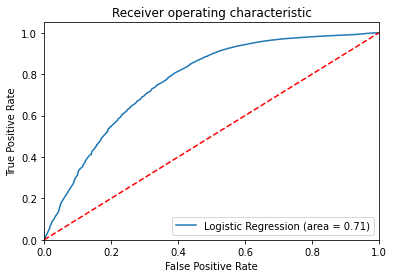

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()